In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurar estilo visual
sns.set_theme(style="whitegrid")

In [3]:
# Cargar dataset filtrado de calidad del agua
df_agua = pd.read_csv('../datos/agua_filtrada_caribe.csv')

In [4]:
df_agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_departamento     1551 non-null   int64  
 1   departamento         1551 non-null   object 
 2   cod_municipio        1551 non-null   int64  
 3   municipio            1551 non-null   object 
 4   anio                 1551 non-null   int64  
 5   irca                 1551 non-null   float64
 6   nivel_riesgo         1551 non-null   object 
 7   irc_urbano           1551 non-null   object 
 8   nivel_riesgo_urbano  1551 non-null   object 
 9   irc_rural            1551 non-null   object 
 10  nivel_riesgo_rural   1551 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 133.4+ KB


In [5]:
df_agua.isnull().sum()

cod_departamento       0
departamento           0
cod_municipio          0
municipio              0
anio                   0
irca                   0
nivel_riesgo           0
irc_urbano             0
nivel_riesgo_urbano    0
irc_rural              0
nivel_riesgo_rural     0
dtype: int64

In [6]:
df_agua.nunique()

cod_departamento         3
departamento             3
cod_municipio          101
municipio              101
anio                    17
irca                   680
nivel_riesgo             5
irc_urbano             652
nivel_riesgo_urbano      6
irc_rural              229
nivel_riesgo_rural       6
dtype: int64

In [7]:
# 📌 Verificar columnas
print("Columnas disponibles:", df_agua.columns)
print("\n-------------------------------------------------------------------------------")
print(df_agua.head())

Columnas disponibles: Index(['cod_departamento', 'departamento', 'cod_municipio', 'municipio',
       'anio', 'irca', 'nivel_riesgo', 'irc_urbano', 'nivel_riesgo_urbano',
       'irc_rural', 'nivel_riesgo_rural'],
      dtype='object')

-------------------------------------------------------------------------------
   cod_departamento departamento  cod_municipio            municipio  anio  \
0                13      BOLÍVAR          13001  CARTAGENA DE INDIAS  2007   
1                13      BOLÍVAR          13001  CARTAGENA DE INDIAS  2008   
2                13      BOLÍVAR          13001  CARTAGENA DE INDIAS  2009   
3                13      BOLÍVAR          13001  CARTAGENA DE INDIAS  2010   
4                13      BOLÍVAR          13001  CARTAGENA DE INDIAS  2011   

   irca nivel_riesgo irc_urbano nivel_riesgo_urbano irc_rural  \
0   3.8   Sin riesgo        3.9          Sin riesgo       0.0   
1   5.7  Riesgo bajo        5.3         Riesgo bajo      10.7   
2   5.6  Riesgo baj

In [9]:
# Asegurarse de que IRCA esté presente
if 'irca' not in df_agua.columns:
    raise ValueError("La columna 'IRCA' no está en el dataset. Revisa el nombre exacto.")
else:
    print("La columna IRCA se encuentra en el dataset")


La columna IRCA se encuentra en el dataset


In [10]:
df_agua['irca'].unique()

array([  3.8,   5.7,   5.6,   0.2,   0. ,   0.1,   0.3,  41.7,  36. ,
        40. ,  29.4,  24.5,  17.5,  27.2,  30.6,  24.8,  47.2,  55.8,
        61.1,  27.1,  38.3,  41.4,  15.9,  14.8,  44.2,  45.1,  16.1,
        46.1,  54.4,  71.9,  50. ,  41. ,  76.1,  19.9,  60. ,  34.9,
        76.7,  49.1,  10.7,  72.9,  57.7,  50.3,  59. ,  66. ,  76.2,
        59.1,  53.3,  68.5,  60.7,  51.6,  26.3,  67.9,  24. ,   8.6,
        13.7,  25.7,  10. ,   2.7,   6.1,   7.5,   4.6,  39.7,  11.5,
         1.3,  49. ,  48.6,  40.4,  52.3,  19.6,  57.9,  55.9,  28.2,
        42.3,  10.9,   8.3,  37.5,  44. ,  18.2,  18.6,  36.2,   7.1,
        35.7,  24.7,  38.9,  32.4,  75. ,   0.5,  27.8,  67.3,  42.4,
        47.8,  49.8,  17. ,  38.6,  32.7,  16.7,  28.3,  56. ,  20.4,
         0.4,   4.5,  16.4,  19. ,  26.7,  30.5,  22.7,  59.7,  45.6,
        23.1,  15.6,   9.4,   4. ,  61.5,  29.9,  33.1,  41.6,  33.9,
        16.6,  48.7,  40.2,   5. ,  25.1,  25. ,  48.5,  34.1,  17.6,
        29.5,  22. ,

In [11]:
df_agua['nivel_riesgo_rural'].unique()

array(['Sin riesgo', 'Riesgo bajo', 'ND', 'Riesgo medio', 'Riesgo alto',
       'Inviable sanitariamente'], dtype=object)

In [12]:
df_agua['nivel_riesgo_urbano'].unique()

array(['Sin riesgo', 'Riesgo bajo', 'Riesgo alto', 'Riesgo medio',
       'Inviable sanitariamente', 'ND'], dtype=object)

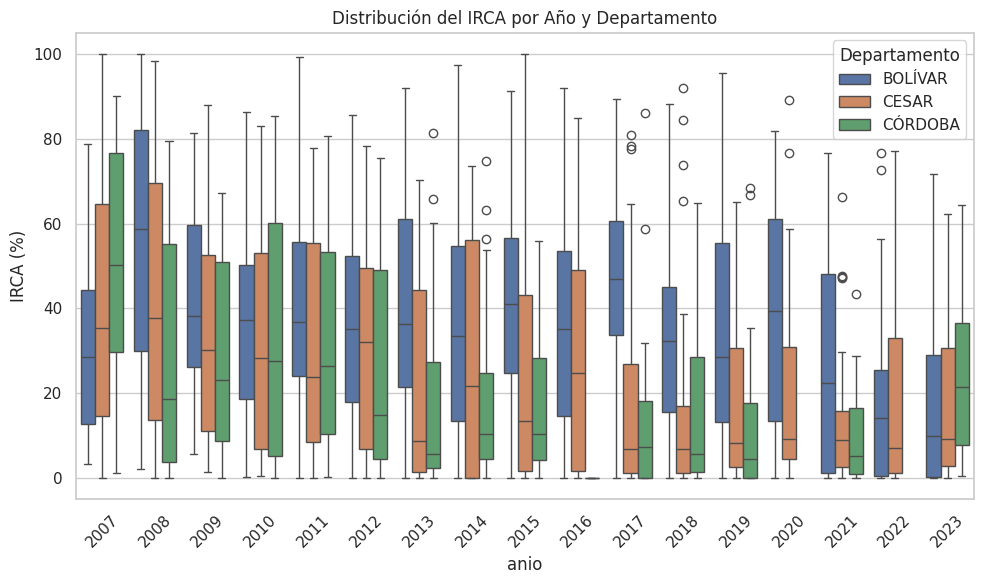

In [14]:
# Ver distribución de IRCA por año y departamento
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_agua, x='anio', y='irca', hue='departamento')
plt.title('Distribución del IRCA por Año y Departamento')
plt.ylabel('IRCA (%)')
plt.xticks(rotation=45)
plt.legend(title='Departamento')
plt.tight_layout()
plt.show()

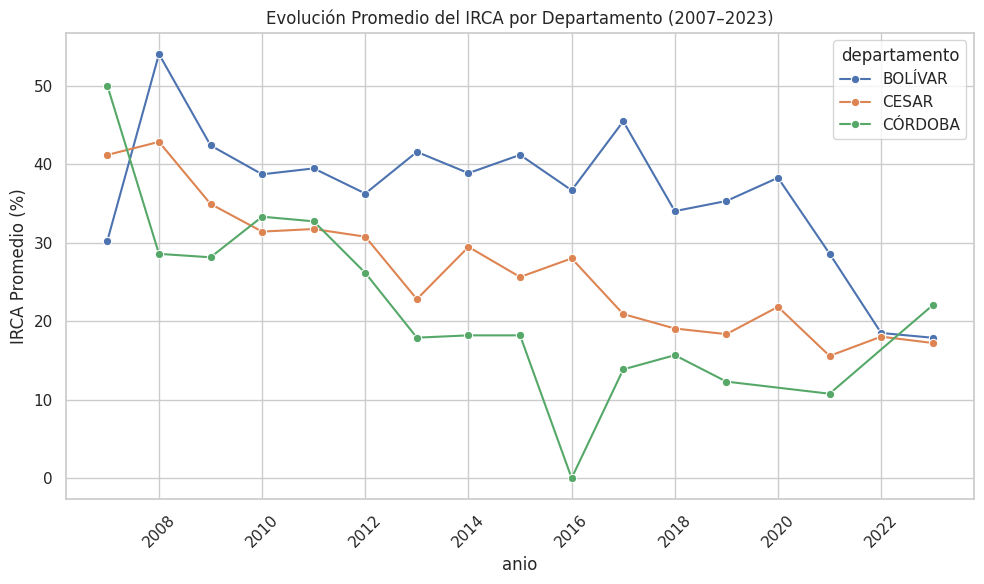

In [15]:
# Evolución del IRCA promedio por departamento
df_irca_anual = df_agua.groupby(['anio', 'departamento'])['irca'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_irca_anual, x='anio', y='irca', hue='departamento', marker='o')
plt.title('Evolución Promedio del IRCA por Departamento (2007–2023)')
plt.ylabel('IRCA Promedio (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Clasificación de riesgo según IRCA
def clasificar_irca(valor):
    if valor <= 5:
        return 'Sin Riesgo'
    elif valor <= 14:
        return 'Riesgo Bajo'
    elif valor <= 35:
        return 'Riesgo Medio'
    elif valor <= 80:
        return 'Riesgo Alto'
    else:
        return 'Riesgo Invial'

df_agua['CLASIFICACION_IRCA'] = df_agua['irca'].apply(clasificar_irca)
df_agua.head()

,cod_departamento,departamento,cod_municipio,municipio,anio,irca,nivel_riesgo,irc_urbano,nivel_riesgo_urbano,irc_rural,nivel_riesgo_rural,CLASIFICACION_IRCA
0,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,2007,3.8,Sin riesgo,3.9,Sin riesgo,0.0,Sin riesgo,Sin Riesgo
1,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,2008,5.7,Riesgo bajo,5.3,Riesgo bajo,10.7,Riesgo bajo,Riesgo Bajo
2,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,2009,5.6,Riesgo bajo,5.6,Riesgo bajo,5.6,Riesgo bajo,Riesgo Bajo
3,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,2010,0.2,Sin riesgo,0.2,Sin riesgo,0.3,Sin riesgo,Sin Riesgo
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,2011,0.0,Sin riesgo,0.0,Sin riesgo,0.0,Sin riesgo,Sin Riesgo


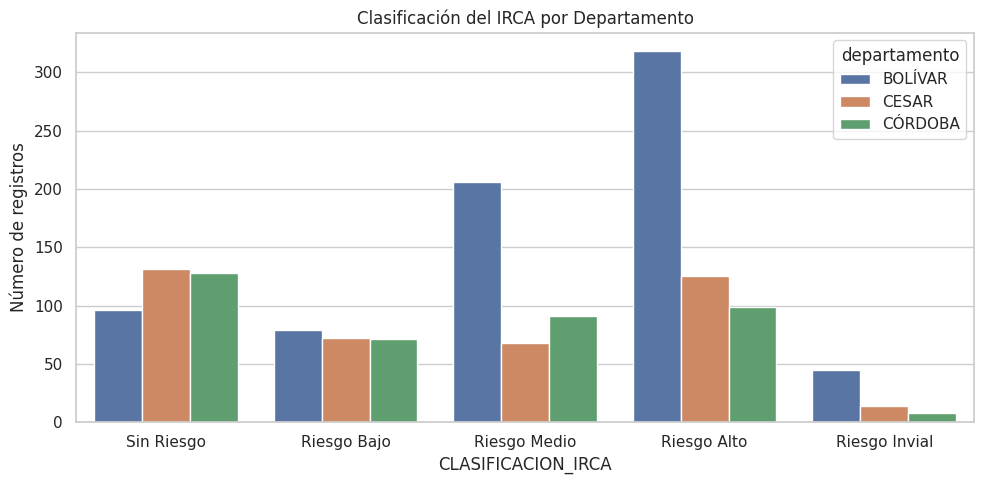

In [19]:
# Conteo por clasificación
plt.figure(figsize=(10, 5))
sns.countplot(data=df_agua, x='CLASIFICACION_IRCA', order=['Sin Riesgo', 'Riesgo Bajo', 'Riesgo Medio', 'Riesgo Alto', 'Riesgo Invial'], hue='departamento')
plt.title('Clasificación del IRCA por Departamento')
plt.ylabel('Número de registros')
plt.tight_layout()
plt.show()

/tmp/ipykernel_16844/917205242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_municipios_irca, x='irca', y='municipio', palette='Reds_r')


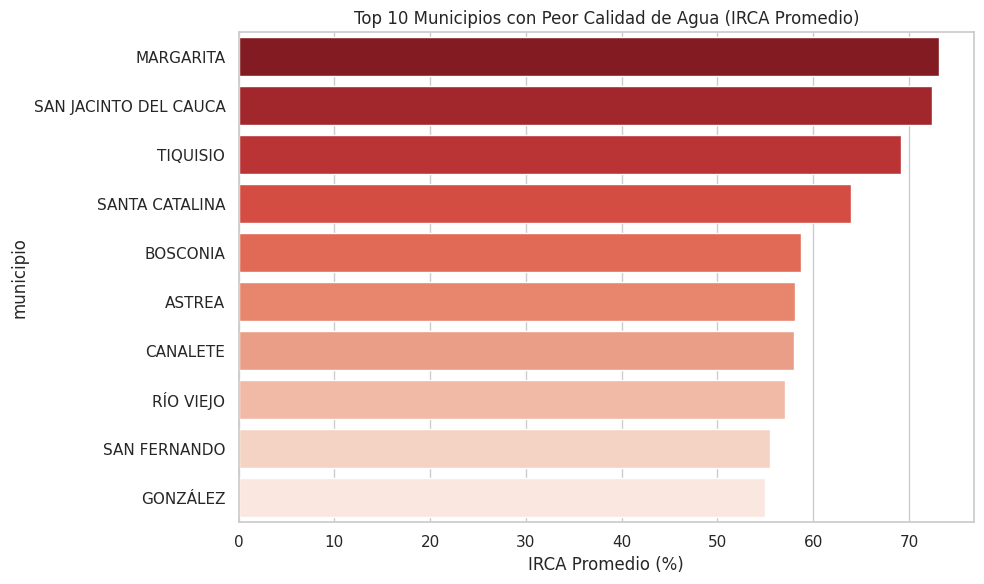

In [21]:
# IRCA promedio por municipio (top 10 peores)
df_municipios_irca = df_agua.groupby('municipio')['irca'].mean().reset_index()
df_municipios_irca = df_municipios_irca.sort_values(by='irca', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_municipios_irca, x='irca', y='municipio', palette='Reds_r')
plt.title('Top 10 Municipios con Peor Calidad de Agua (IRCA Promedio)')
plt.xlabel('IRCA Promedio (%)')
plt.tight_layout()
plt.show()
